# Wine Quality Prediction Analysis

### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Data Collection 

In [2]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv("Red_Wine_Analysis_File.csv")

In [3]:
wine_dataset.shape

(1599, 12)

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


### Checking for missing Values 

In [5]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

### Replacing the missing values by mean method

In [6]:
#filling null values with the mean method
df = wine_dataset
df['total sulfur dioxide'] = df['total sulfur dioxide'].fillna(df['total sulfur dioxide'].mean())
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['quality'] = df['quality'].fillna(df['quality'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


### Data Analysis and Visulaization 

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.865961,0.001887,0.080321,0.169507,1.065668,0.807413
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


### Using Inter Quartile Method for detecting Outliers

In [8]:
# Detecting number of outliers for each variable :

for i in df.columns :
    # determine IQR :
    IQR = (df[i].quantile(0.75) - df[i].quantile(0.25))
    
    upper_limit_value = df[i].quantile(0.75) + (IQR*1.5)
    lower_limit_value = df[i].quantile(0.25) - (IQR*1.5)
    
    up_outliers_num = df[df[i] > upper_limit_value].shape[0]
    lo_outliers_num = df[df[i] < lower_limit_value].shape[0]
    total_out_rec = up_outliers_num + lo_outliers_num
    print('Number of records which are detected as outliers w.r.t "{}" variable is :'.format(i) ,total_out_rec)

Number of records which are detected as outliers w.r.t "fixed acidity" variable is : 49
Number of records which are detected as outliers w.r.t "volatile acidity" variable is : 19
Number of records which are detected as outliers w.r.t "citric acid" variable is : 1
Number of records which are detected as outliers w.r.t "residual sugar" variable is : 155
Number of records which are detected as outliers w.r.t "chlorides" variable is : 112
Number of records which are detected as outliers w.r.t "free sulfur dioxide" variable is : 30
Number of records which are detected as outliers w.r.t "total sulfur dioxide" variable is : 55
Number of records which are detected as outliers w.r.t "density" variable is : 45
Number of records which are detected as outliers w.r.t "pH" variable is : 183
Number of records which are detected as outliers w.r.t "sulphates" variable is : 59
Number of records which are detected as outliers w.r.t "alcohol" variable is : 13
Number of records which are detected as outlie

In [9]:
# calculate the total number of outliers :
total_num_out = 0
for i in df.columns :
    IQR = (df[i].quantile(0.75) - df[i].quantile(0.25))
    upper_limit_value = df[i].quantile(0.75) + (IQR*1.5)
    lower_limit_value = df[i].quantile(0.25) - (IQR*1.5)
    up_outliers_num = df[df[i] > upper_limit_value].shape[0]
    lo_outliers_num = df[df[i] < lower_limit_value].shape[0]
    total_out = up_outliers_num + lo_outliers_num
    total_num_out = total_num_out + total_out
print("total number of outliers is :", total_num_out)
print("percentage of outliers is",total_num_out*100/df.shape[0])

total number of outliers is : 749
percentage of outliers is 46.84177611006879


<Figure size 360x360 with 0 Axes>

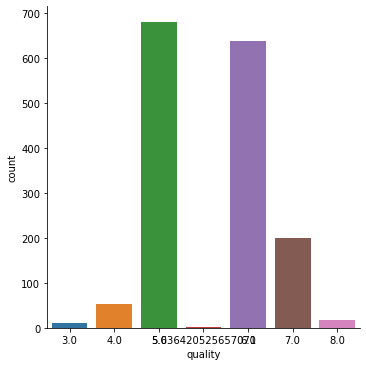

In [10]:
# number of values for each quality
plot = plt.figure(figsize=(5,5))
sns.catplot(x='quality', data = df, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

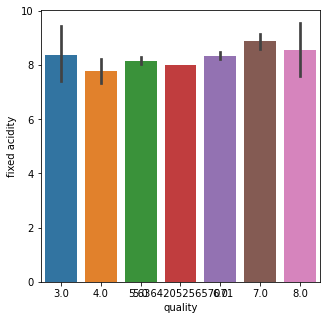

In [11]:
# fixed acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

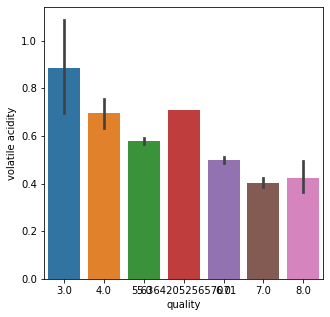

In [12]:
#volatile acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

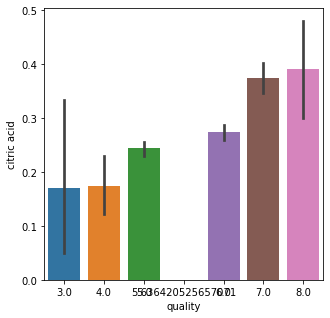

In [13]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

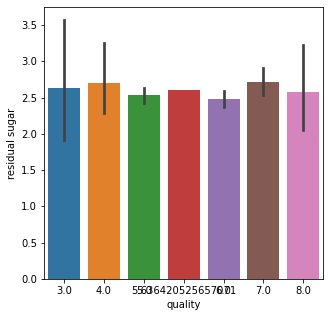

In [14]:
#residual sugar vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

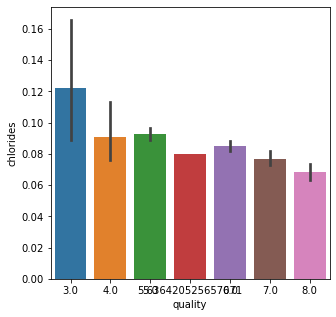

In [15]:
#chlorides vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

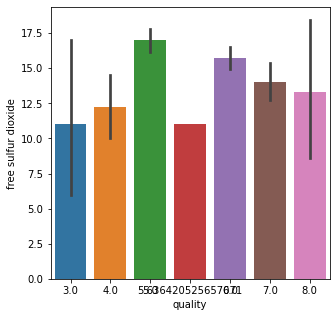

In [16]:
#free sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

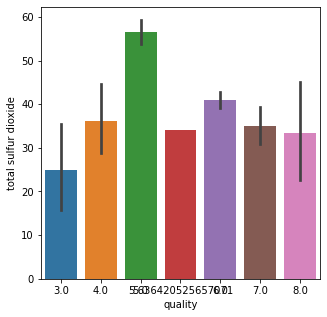

In [17]:
#total sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='density'>

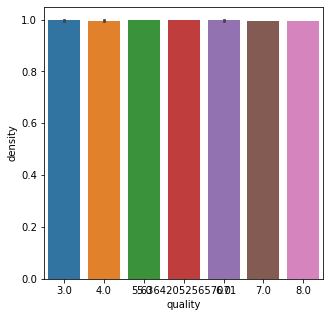

In [18]:
#density vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'density', data = df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

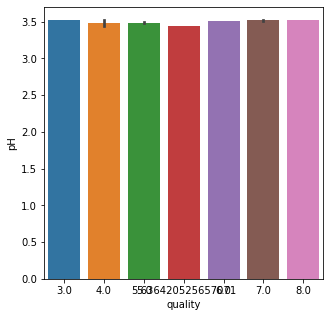

In [19]:
#pH vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'pH', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

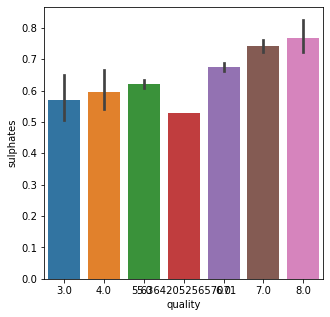

In [20]:
#sulphates vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

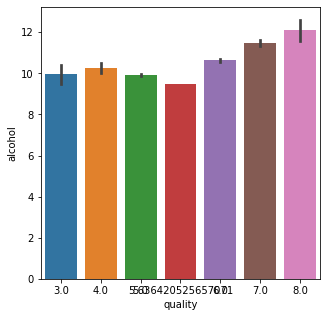

In [21]:
#alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = df)

### Finding the Coorelation of the analysed data 

In [22]:
correlation = df.corr()

### Constructing a Heatmap 

<AxesSubplot:>

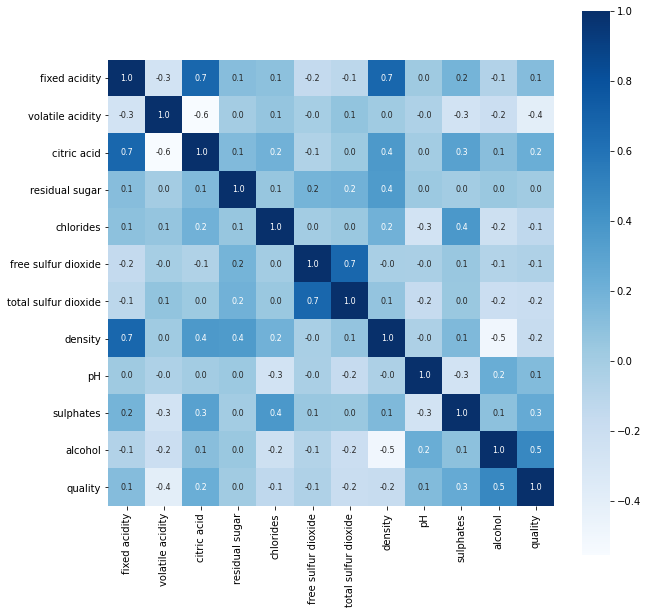

In [23]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

### Data Processing

In [24]:
# separate the data and Label
X = df.drop('quality',axis=1)

In [25]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### Label Binarization 

In [26]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [27]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


### Train & Test Split method 

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [29]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


### Model Training:
### Random Forest Classifier

In [30]:
model = RandomForestClassifier()

In [31]:
model.fit(X_train, Y_train)

RandomForestClassifier()

### Model Evaluation:

### Accuracy Score

In [32]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.928125


### Building a Predictive System 

In [36]:
input_data = (8.9,0.62,0.19,3.9,0.17,51,148,0.9986,3.17,0.93,9.2)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine
